# Week 5 - Genetic Algorithms
---

**Very nice lecture I recommend you watch:** <br>
[MIT 6.034 Artificial Intelligence, Fall 2010 13. Learning: Genetic Algorithms](https://www.youtube.com/watch?v=kHyNqSnzP8Y)

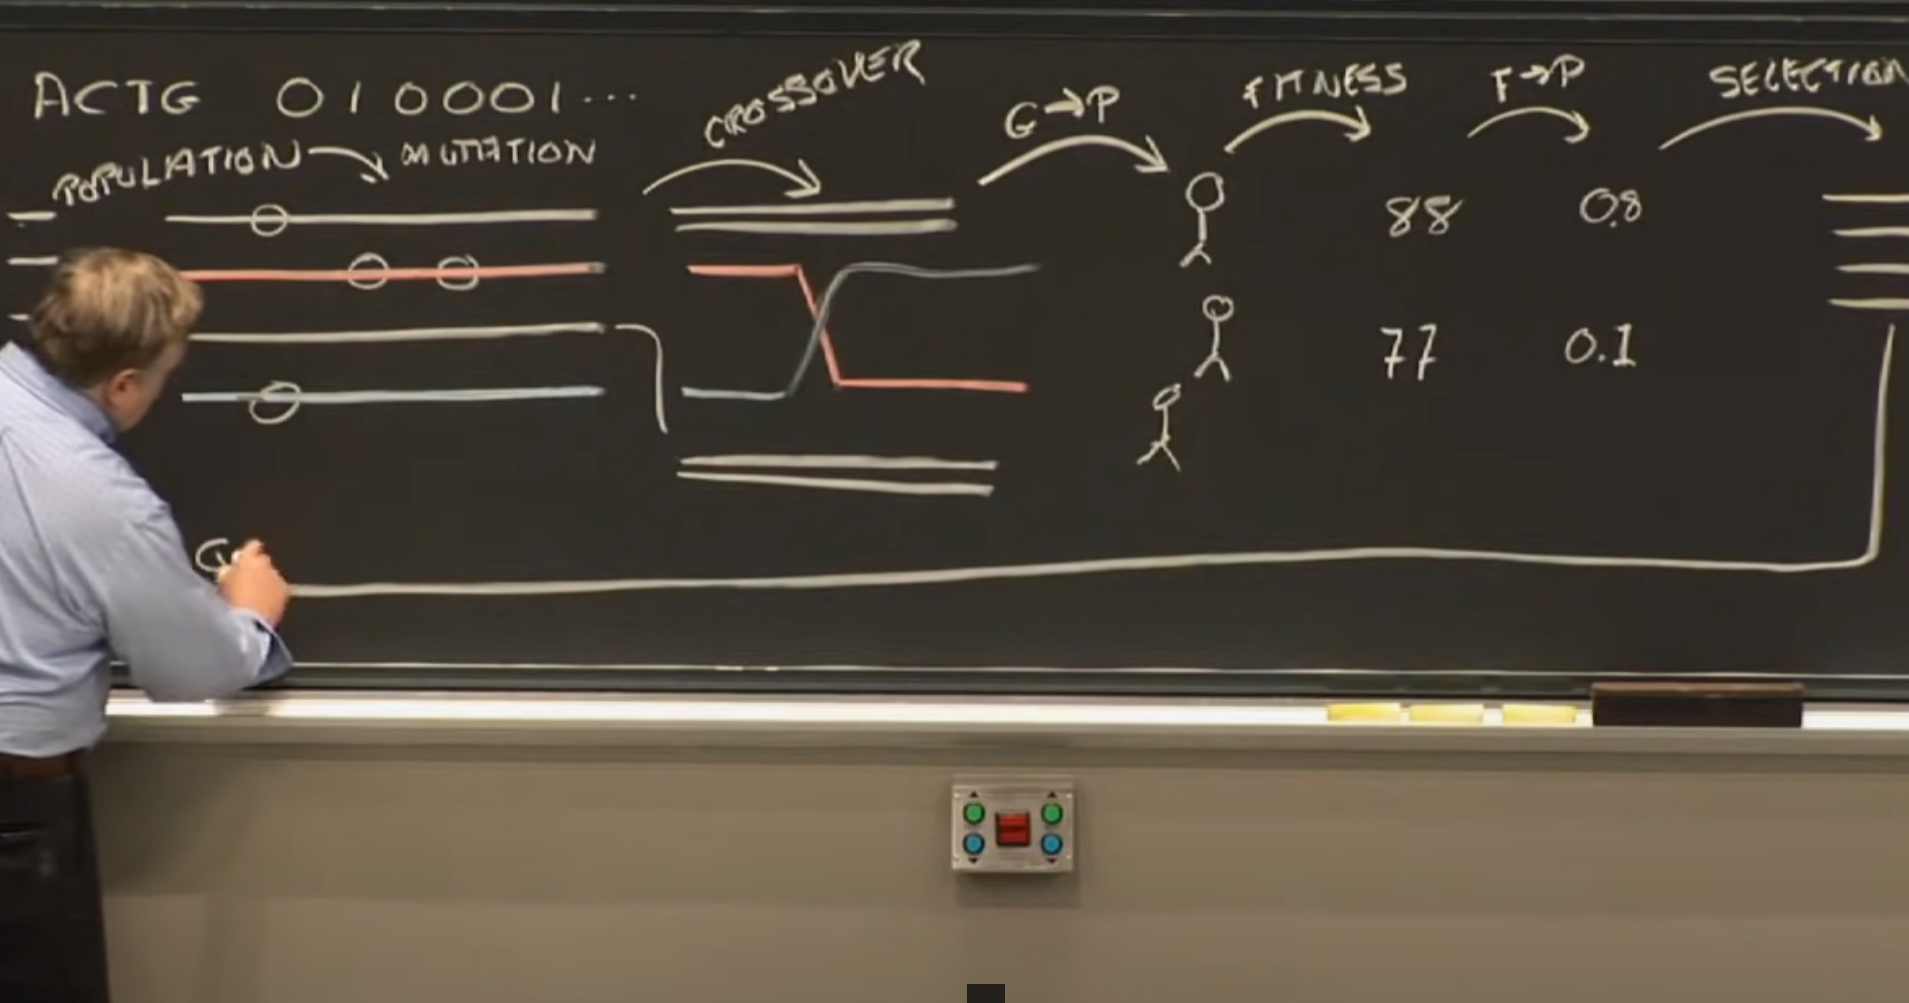

---

# Classic toy example - evolving a string

## Implementation in class

In [18]:
import random

In [17]:
genes = "abcdefghijklmnopqrstuvwxyz "

In [46]:
def get_random_agent(dna_size):
    return ''.join(random.choices(genes, k=dna_size))

get_random_agent(dna_size=10)

'ck ubvgxyr'

In [50]:
def init_population(population_size, dna_size):
    result = []
    for _ in range(population_size):
        random_agent = get_random_agent(dna_size=dna_size)
        result.append(random_agent)
        
    return result

In [56]:
init_population(10, dna_size=50)

['mwobcfklteeaolgmryatruzgzkdjrklqhohpwisrubyorjymqx',
 'hoennznlbywvnuniskttgbmyyqictpbojxetluwivyybrxvskx',
 'ccdukxhyloviltgxxoqhbaunucvidpwepqwbyvdqkpiglrbutn',
 'phjjjbnxhj gpbztvnnmxtaqdvukuqntvjnscn juixpxzocvn',
 'zdx dolpucaqnakjdcprgugqfdjihaiolsbwrekockjodaiywj',
 'jgqdrwyghdaiykycfok cqblfvwgpooxffztkjhqtemgypcpzh',
 'rqmbjdzbacykobospu dxyobrqwwixnmjzwdlwnjyshepkjcls',
 'zppzoicdspiokkfbedyyouw mowhojqsgqorcnlbsksqpntsou',
 'zqnsbvkikhnbakoivialzsinjescqmejettjmj mlmjekicmry',
 'etzjqjkribcerssvkkftku floctstvtyafyyppjozzcgem fx']

In [58]:
def get_agent_fitness(agent, target):
    score = 0
    for i in range(len(agent)):
        agent_gene = agent[i]
        target_gene = target[i]
        score += agent_gene == target_gene

    return score

In [60]:
get_agent_fitness('alababa', target='alabala')

6

In [93]:
def mutate_agent(agent):
    agent = agent[::]
    i = random.randint(0, len(agent) - 1)
    j = random.randint(0, len(agent) - 1)
    agent = list(agent)
    agent[i], agent[j] = agent[j], agent[i]
    return ''.join(agent)

In [105]:
mutate_agent('abc')

'acb'

In [128]:
def crossover(parent_a, parent_b):
    i = random.randint(0, len(parent_a) - 1)
    j = random.randint(0, len(parent_a) - 1)
    i, j = min(i, j), max(i, j)
    return (
        parent_a[:i] + parent_b[i:j] + parent_a[j:],
        parent_b[:i] + parent_a[i:j] + parent_b[j:],
    )

In [134]:
crossover(
    'abcdef',
    'ghijkl',
)

('abcdkf', 'ghijel')

In [172]:
def get_next_population(population, target):
    population_fitness = [get_agent_fitness(agent, target) for agent in population]

    parents_a = random.choices(population, weights=population_fitness, k=10)
    parents_b = random.choices(population, weights=population_fitness, k=10)
    new_population = []

    for parent_a, parent_b in zip(parents_a, parents_b):
        child_a, child_b = crossover(parent_a, parent_b)

        child_a = mutate_agent(child_a)
        child_b = mutate_agent(child_b)

        new_population.append(child_a)
        new_population.append(child_a)

    population = list(sorted(population, key=lambda a: get_agent_fitness(a, target)))

    new_population = new_population + population[-30:]
    new_population = list(sorted(new_population, key=lambda a: get_agent_fitness(a, target)))

    return new_population

In [176]:
target = 'genetics'
pop = init_population(50, dna_size=len(target))
len(get_next_population(pop, target))

50

In [187]:
target = 'genetics'
pop = init_population(50, dna_size=len(target))
    
for _ in range(5000):
    pop = get_next_population(pop, target)
#     print(pop[-1])

In [194]:
pop[-5:]

['geneslcs', 'geneelcs', 'geneelcs', 'geneelcs', 'geneelcs']

## Evolving a string animated

In [1]:
import random

alphabet = "abcdefghijklmnopqrstuvwxyz "

def random_dna(target_length):
    return ''.join(random.choices(alphabet, k=target_length))

In [2]:
random_dna(target_length=10)

'n omvzwyfx'

In [3]:
def initial_population(population_size, target_length):
    population = []
    for i in range(population_size):
        dna = random_dna(target_length=target_length)
        population.append(dna)
        
    return population

In [4]:
example_population = initial_population(population_size=5, target_length=10)
example_population

['cwpkg mzkz', 'jrtrqipjdf', 'gbokkqjibj', 'uppishqegk', 'ckutvfoyis']

In [5]:
def fitness(dna, target):
    return sum(a == b for a, b in zip(dna, target))

In [6]:
target = 'the quick brown fox'
dna = random_dna(target_length=len(target))
fitness(dna, target=target)

1

In [7]:
def select_parents(population, individual_fitness, selection_size, target):
    parents = []
    left_parents = random.choices(population, weights=individual_fitness, k=selection_size)
    right_parents = random.choices(population, weights=individual_fitness, k=selection_size)
    return list(zip(left_parents, right_parents)), individual_fitness

In [8]:
individual_fitness = [fitness(dna, target) for dna in example_population]
example_parents, _ = select_parents(example_population, individual_fitness, selection_size=5, target=target)
example_parents

[('cwpkg mzkz', 'cwpkg mzkz'),
 ('cwpkg mzkz', 'jrtrqipjdf'),
 ('cwpkg mzkz', 'cwpkg mzkz'),
 ('jrtrqipjdf', 'jrtrqipjdf'),
 ('cwpkg mzkz', 'jrtrqipjdf')]

In [9]:
def crossover(left_parent, right_parent):
    p = random.randint(0, len(left_parent))
    return left_parent[:p] + right_parent[p:], right_parent[:p] + left_parent[p:]

In [10]:
crossover(*example_parents[0])

('cwpkg mzkz', 'cwpkg mzkz')

In [11]:
def rand():
    return random.random()

In [12]:
def mutate(dna, mutation_probability=0.5):
    other_dna = random_dna(target_length=len(dna))
    return ''.join(a if rand() > mutation_probability else b for a, b in zip(dna, other_dna))

In [189]:
mutate(example_population[0], mutation_probability=0.1)

'cwpkg uzkz'

In [190]:
from IPython.display import clear_output, display
from ipywidgets import Output
from tqdm.auto import tqdm
import time

out = Output()

In [191]:
target = 'the quick brown fox jums over the lazy dog'
population = initial_population(population_size=20, target_length=len(target))
num_generations = 10000

display(out)

for i in tqdm(range(num_generations)):
    individual_fitness = [fitness(dna, target) for dna in population]
    parents, fitness_scores = select_parents(
        population,
        individual_fitness,
        selection_size=len(population) // 2,
        target=target,
    )

    new_population = [p[0] for p in sorted(zip(population, individual_fitness), key=lambda x: x[1])]
    new_population = new_population[-len(new_population) // 2:]
    for parent_a, parent_b in parents:
        child_a, child_b = crossover(parent_a, parent_b)
        new_population.append(mutate(child_a, mutation_probability=0.1))
    
    population = new_population
    population_scores = [fitness(p, target) for p in population]
    
    population_display = sorted(list(zip(population, population_scores)), key=lambda x: x[1])[-10:]

    with out:
        time.sleep(0.001)
        clear_output(wait=True)
        display(population_display)

    if target in population:
        break

Output()